<a href="https://colab.research.google.com/github/Manu-Gr/K-Means-CLustering/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
Univ = pd.read_csv("Universities.csv")  

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

###Finding the optimum number of clusters using **Elbow Plot**

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

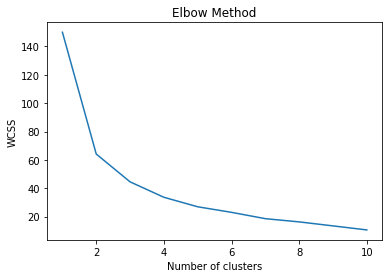

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###Build Cluster algorithm using **K = 4**

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [ ]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [ ]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


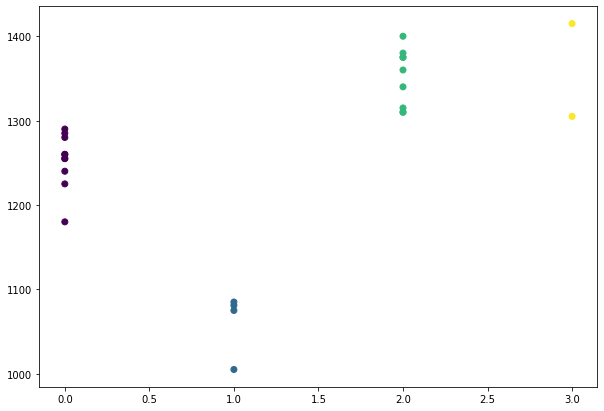

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(Univ['clusterid_new'],Univ['SAT'], c=clusters_new.labels_)

###Build Cluster algorith for **K = 3**

In [ ]:
clusters_new1 = KMeans(3, random_state=42)
clusters_new1.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
clusters_new1.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
Univ1 = Univ.copy()
Univ1['clusterid_new1'] = clusters_new1.labels_
Univ1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new,clusterid_new1
0,Brown,1310,89,22,13,22704,94,2,2
1,CalTech,1415,100,25,6,63575,81,3,0
2,CMU,1260,62,59,9,25026,72,0,2
3,Columbia,1310,76,24,12,31510,88,2,2
4,Cornell,1280,83,33,13,21864,90,0,2
5,Dartmouth,1340,89,23,10,32162,95,2,0
6,Duke,1315,90,30,12,31585,95,2,0
7,Georgetown,1255,74,24,12,20126,92,0,2
8,Harvard,1400,91,14,11,39525,97,2,0
9,JohnsHopkins,1305,75,44,7,58691,87,3,0


In [ ]:
clusters_new1.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

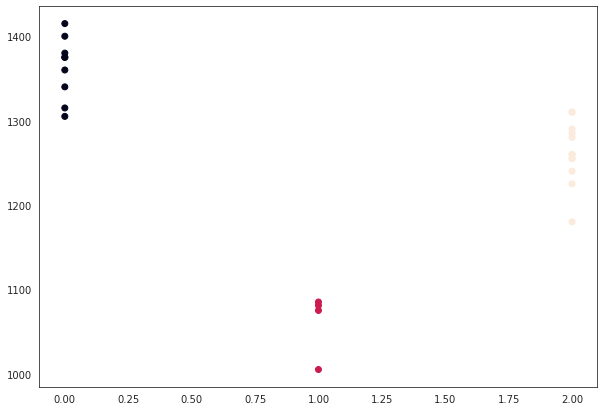

In [ ]:
# Plot Clusters
sns.set_style('white')
plt.figure(figsize=(10, 7))  
plt.scatter(Univ1['clusterid_new1'],Univ1['SAT'], c=clusters_new1.labels_)